# Find maxima
In this notebook we demonstrate how to count blobs in an image without segmenting them using local maximum detection.

In [2]:
from pyclesperanto import cle

from skimage.io import imread

We first load an image using scikit-image's `imread()` function and visualize it.

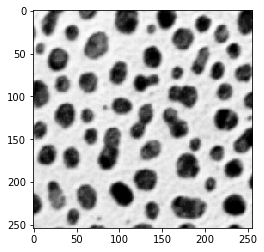

In [3]:
image = imread("https://imagej.nih.gov/ij/images/blobs.gif")

cle.imshow(image)

We invert intensity in order to have a dark background and a bright object of interest.

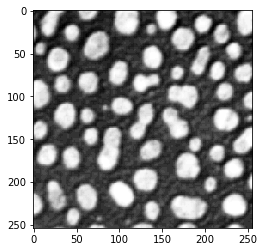

In [4]:
inverted_image = cle.subtract_image_from_scalar(image, scalar=255)

cle.imshow(inverted_image)

We can blur this image using a `gaussian_blur` filter. All filters and image processing operations are available via the `cle.` gateway. 

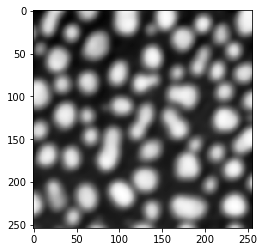

In [5]:
object_radius = 4

blurred_image = cle.gaussian_blur(inverted_image, sigma_x=object_radius, sigma_y=object_radius)

cle.imshow(blurred_image)

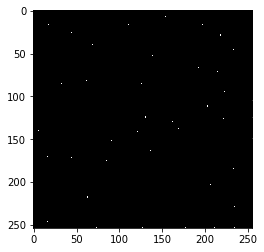

In [6]:
local_maxima = cle.detect_maxima_box(blurred_image)

cle.imshow(local_maxima)

In this image, we can count detected spots. The white pixels have intensity 1.

In [7]:
number_of_spots = cle.sum_of_all_pixels(local_maxima)

print("Spots found:", number_of_spots)

Spots found: 68.0


For visualization purposes we increase the single pixels and visualize them on the original image.

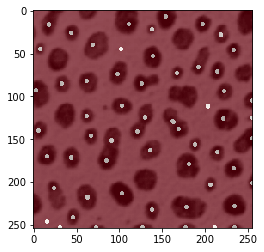

In [8]:
circles = cle.dilate_sphere(cle.maximum_box(local_maxima, radius_x=1, radius_y=1))

cle.imshow(image, continue_drawing=True)
cle.imshow(circles, alpha=0.7, colormap="Reds_r")